# Part 3 - CNN Binary Classification

In [1]:
# Import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from glob import glob

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# For reproducibility
np.random.seed(42)

In [2]:
train_dir = './data/chest_xray/train/'
test_dir = './data/chest_xray/test/'

In [3]:
classes = ['normal', 'pneumonia']

In [4]:
train_generator = ImageDataGenerator(
                            rotation_range=20,
                            width_shift_range=0.25,
                            height_shift_range=0.25,
                            rescale=1./255,
                            shear_range=0.25,
                            zoom_range=0.25,
                            horizontal_flip=True,
                            fill_mode='nearest'
                            )

In [5]:
train_set = DirectoryIterator(train_dir,
                             train_generator,
                             target_size = (224, 224),
                             color_mode = 'RGB',
                             batch_size = 16,
                             classes=classes,
                             class_mode = 'categorical')

Found 5232 images belonging to 2 classes.


In [6]:
test_generator = ImageDataGenerator(rescale=1./255)

In [7]:
test_set = DirectoryIterator(test_dir,
                             test_generator,
                             target_size = (224, 224),
                             color_mode = 'RGB',
                             batch_size = 16, # set batch size a number that divides sample size
                             classes=classes,
                             class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [8]:
train_set.image_shape

(224, 224, 1)

In [9]:
test_set.image_shape

(224, 224, 1)

In [10]:
train_size = len(train_set.filenames)
test_size = len(test_set.filenames)

In [11]:
train_size, test_size

(5232, 624)

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same",
                 input_shape=train_set.image_shape))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))

model.add(BatchNormalization())

model.add(Dropout(rate=0.4))

model.add(Dense(3, activation="softmax"))

In [13]:
model.compile(Adam(lr=0.01), 
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
batch_size = 16

In [15]:
history = model.fit_generator(train_set, 
                              validation_data=test_set,
                              steps_per_epoch = train_size/batch_size, 
                              validation_steps = test_size/batch_size,
                              epochs=10)

Epoch 1/5
327/327 [==============================] - 1307s 4s/step - loss: 1.3086 - accuracy: 0.7322 - val_loss: 3.2580 - val_accuracy: 0.6122
Epoch 2/5
327/327 [==============================] - 1293s 4s/step - loss: 0.8201 - accuracy: 0.7597 - val_loss: 1.7203 - val_accuracy: 0.6282
Epoch 3/5
327/327 [==============================] - 1295s 4s/step - loss: 0.6039 - accuracy: 0.7953 - val_loss: 1.1171 - val_accuracy: 0.6474
Epoch 4/5
327/327 [==============================] - 1297s 4s/step - loss: 0.4859 - accuracy: 0.7997 - val_loss: 0.5188 - val_accuracy: 0.7372
Epoch 5/5
327/327 [==============================] - 1312s 4s/step - loss: 0.4069 - accuracy: 0.8366 - val_loss: 1.0397 - val_accuracy: 0.6683


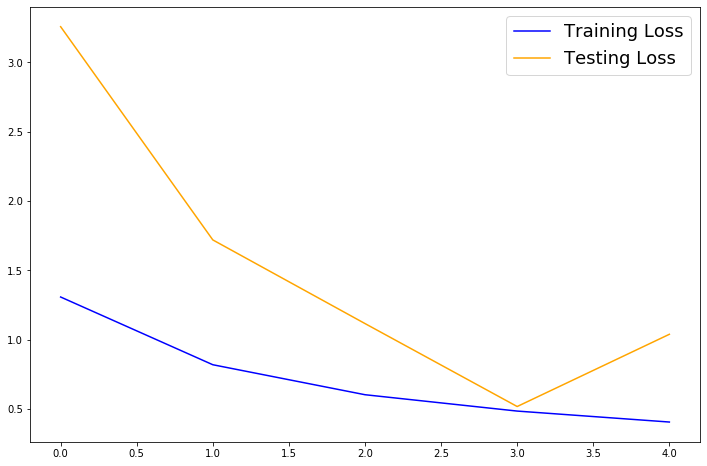

In [16]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
# Generate line plot of training, testing loss over epochs.
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(test_loss, label='Testing Loss', color='orange')
plt.legend(fontsize = 18);

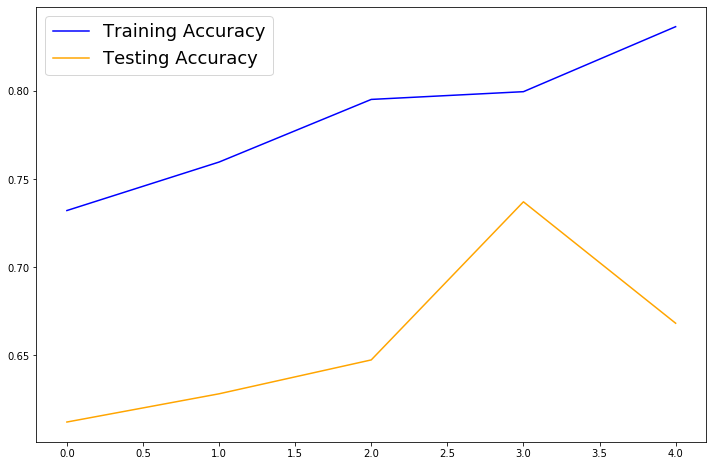

In [17]:
# Check out our train accuracy and test accuracy over epochs.
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
# Generate line plot of training, testing loss over epochs.
plt.figure(figsize=(12, 8))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(test_accuracy, label='Testing Accuracy', color='orange')
plt.legend(fontsize = 18);

In [19]:
predictions = model.predict_generator(generator = test_set, 
                                       steps = test_size/batch_size
                                      )

In [20]:
y_hat = np.argmax(predictions, axis = 1) 
y_true = test_set.classes

In [25]:
y_hat

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [21]:
len(y_true) == len(y_hat)

True

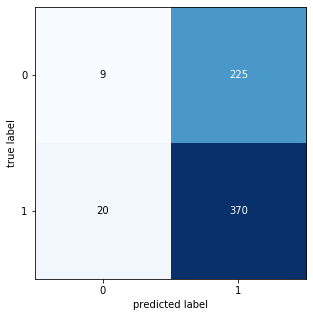

In [22]:
CM = confusion_matrix(y_true, y_hat)
fig, ax = plot_confusion_matrix(conf_mat=CM,  figsize=(5, 5))
plt.show()

In [23]:
true_negative, false_positive, false_negative, true_positive  = CM.ravel()
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

print('Precison of chest X-ray for pneumonia:{:.2f}'.format(precision))
print('Recall of chest X-ray for pneumonia:{:.2f}'.format(recall))

Precison of chest X-ray for pneumonia:0.62
Recall of chest X-ray for pneumonia:0.95
